
# RECOOMENDATION BASED ON SIMILARITY IN RATING 

##### This project utilizes user-item rating data to identify movies similar to a given movie based on user ratings, provide recommendations based on movie user liked. This project does not consider specific user preferences and does not provide personalized recommendations. Instead, it offers recommendations based on the similarity of movies as perceived by the entire user community.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [102]:
# Column names manually extracted from the dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Get the current working directory
current_dir = os.getcwd()

# Construct the file path
users_path = os.path.join(current_dir, "u.data")
movies_path = os.path.join(current_dir, "movie_id.txt")

# Read the data
users = pd.read_csv(users_path, sep='\t', names=column_names)
movies = pd.read_csv(movies_path)

In [103]:
movies.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [104]:
users.head(3)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [105]:
merged_data = pd.merge(users, movies, on = "item_id")
merged_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [106]:
# Group the merged_data DataFrame by movie titles and calculate the mean rating for each movie
merged_data.groupby("title")["rating"].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [107]:
# Compute the number of ratings for each movie title and add it as a new column
merged_data["number_of_ratings"] = merged_data.groupby("title")["rating"].transform("count")
merged_data = merged_data.set_index("title")
merged_data.head(3)

,user_id,item_id,rating,timestamp,number_of_ratings
title,,,,,
Star Wars (1977),0,50,5,881250949,584
Star Wars (1977),290,50,5,880473582,584
Star Wars (1977),79,50,4,891271545,584


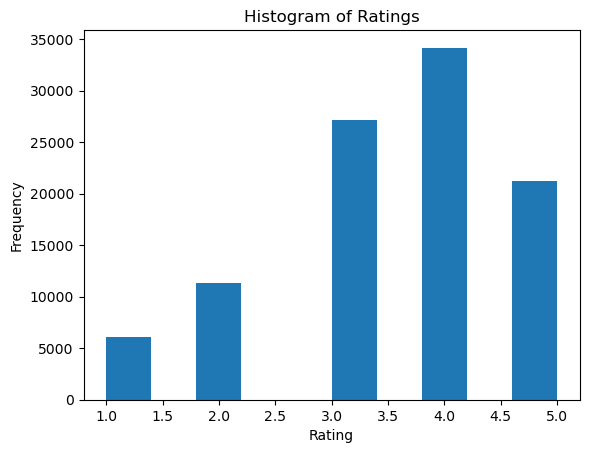

In [108]:
# Create a histogram of ratings
ratings_hist = plt.hist(merged_data["rating"])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

In [109]:
# Create a pivot table with user IDs as rows, movie titles as columns, and ratings as values
user_film_rating = merged_data.pivot_table(columns ="title", values ="rating", index ="user_id" )
user_film_rating = user_film_rating.fillna(0)
user_film_rating.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Compute the rating_mean for each movie title and add it as a new column
merged_data["rating_mean"] = merged_data.groupby("title")["rating"].transform("mean")
merged_data = merged_data[["number_of_ratings","rating_mean"]]
merged_data = merged_data.drop_duplicates()
merged_data.head()

,number_of_ratings,rating_mean
title,,
Star Wars (1977),584,4.359589
"Empire Strikes Back, The (1980)",368,4.206522
Gone with the Wind (1939),172,3.854651
Kolya (1996),117,3.991453
L.A. Confidential (1997),297,4.161616


In [111]:
def recommend_me_movie(your_favourite_movie):
    try:
        global merged_data
        
        # Extract ratings of the user's favorite movie from the pivot table
        movie_rating = user_film_rating[your_favourite_movie]
        
        # Calculate the correlation
        similar_movie = user_film_rating.corrwith(movie_rating)
        similar_movie = pd.DataFrame(similar_movie,columns=['Correlation'])
        
        # Join the correlation DataFrame with the merged data to include additional movie information
        similar_movie = similar_movie.join(merged_data)
        
        # Filter out movies with fewer than 200 ratings and sort remaining movies based on correlation
        similar_movie = similar_movie[similar_movie["number_of_ratings"]>200].sort_values(by = "Correlation", ascending = False)
        
        # Return TOP 10 similar movies
        if similar_movie.shape[0]>11:
            return list(similar_movie.iloc[1:11].index)
    
    except:
        print("Try another movie anme ")

In [112]:
# Eaxmple 
recommend_me_movie("Pulp Fiction (1994)")

['Silence of the Lambs, The (1991)',
 'Raiders of the Lost Ark (1981)',
 'Usual Suspects, The (1995)',
 'Seven (Se7en) (1995)',
 'Fugitive, The (1993)',
 'Get Shorty (1995)',
 'GoodFellas (1990)',
 'Back to the Future (1985)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)']